In [1]:
import numpy as np
import faiss

from scipy.spatial import distance_matrix
from scipy.io import savemat

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot
vapeplot.set_palette('vaporwave')

In [2]:
num_points = 50

centers = np.array([
    [0.5, 0.5],
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

r = 0.25

np.random.seed(0)
xs = np.random.rand(num_points, 2).astype(np.float32)

# process labels
d = distance_matrix(xs, centers)
onehot = d < r
onehot = np.hstack([((d < 0.25).sum(axis=1) == 0).reshape(-1, 1), onehot])
labels = np.argmax(onehot.astype(int), axis=1) + 1

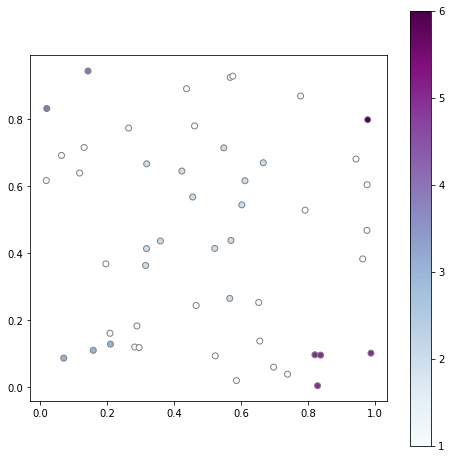

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.scatter(xs[:, 0], xs[:, 1], cmap='BuPu', c=labels, edgecolors='grey')

ax.set_aspect('equal', 'box')
plt.colorbar(c);

In [4]:
k = 3

index = faiss.IndexFlatL2(2)
index.add(xs)

dists, nns = index.search(xs, k + 1)
dists = dists[:, 1:]
sims = np.exp(-dists)
nns = nns[:, 1:] + 1

In [5]:
sims

array([[0.98817396, 0.98643416, 0.9842279 ],
       [0.9947354 , 0.9877196 , 0.98028624],
       [0.99296874, 0.98855984, 0.9806326 ],
       [0.98713744, 0.98200077, 0.97965854],
       [0.9926032 , 0.951999  , 0.9505454 ],
       [0.9649241 , 0.96467674, 0.9629477 ],
       [0.99992394, 0.98200077, 0.96811855],
       [0.9917615 , 0.9790579 , 0.975795  ],
       [0.9786599 , 0.97436035, 0.9726634 ],
       [0.9565678 , 0.95580137, 0.95386136],
       [0.9851274 , 0.9629431 , 0.95580137],
       [0.98817396, 0.98713744, 0.9806326 ],
       [0.99432486, 0.9939973 , 0.98965997],
       [0.9726634 , 0.95720464, 0.9490692 ],
       [0.9970936 , 0.9767694 , 0.9760074 ],
       [0.9857734 , 0.9792407 , 0.96192515],
       [0.99296874, 0.97819126, 0.9737446 ],
       [0.9923714 , 0.98965997, 0.9777405 ],
       [0.9947354 , 0.9941441 , 0.98643416],
       [0.9930096 , 0.9851274 , 0.9545671 ],
       [0.99775976, 0.99270767, 0.9737446 ],
       [0.9978266 , 0.9922469 , 0.9861402 ],
       [0.

In [6]:
nns

array([[12, 19, 23],
       [19, 26, 23],
       [17, 46, 12],
       [12,  7, 45],
       [36, 37,  6],
       [23,  2, 36],
       [45,  4, 12],
       [31, 24, 28],
       [42, 47, 14],
       [45, 11,  7],
       [20, 37, 10],
       [ 1,  4,  3],
       [42, 47, 18],
       [ 9, 16, 47],
       [26,  2, 43],
       [46, 47, 12],
       [ 3,  2, 21],
       [42, 13, 47],
       [ 2, 23,  1],
       [37, 11,  6],
       [41, 25, 17],
       [38, 32, 49],
       [19,  1,  2],
       [28, 31, 39],
       [41, 21, 33],
       [15,  2, 17],
       [35, 34, 50],
       [24, 31, 48],
       [43, 32, 30],
       [43, 44, 15],
       [24, 28,  8],
       [22, 29, 38],
       [25, 41, 21],
       [35, 50, 38],
       [34, 50, 38],
       [ 5, 37,  6],
       [20, 36, 11],
       [22, 50, 34],
       [40, 48, 24],
       [39, 48, 24],
       [21, 25, 33],
       [47, 13, 18],
       [29, 30, 32],
       [49, 32, 30],
       [ 7,  4, 12],
       [ 3, 16, 17],
       [42, 13, 16],
       [39, 4

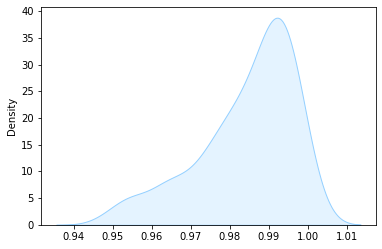

In [7]:
sns.kdeplot(sims.flatten(), shade=True);

In [8]:
if num_points > 50:
    savemat(
        '../../data/square/square_nearest_neighbors.mat',
        {
            'nearest_neighbors': nns, 
            'similarities': sims, 
            'x': xs, 
            'labels': labels.reshape(-1, 1)
        }
    )
else:
    savemat(
        '../../data/square_small/square_small_nearest_neighbors.mat',
        {
            'nearest_neighbors': nns, 
            'similarities': sims, 
            'x': xs, 
            'labels': labels.reshape(-1, 1)
        }
    )

In [9]:
for label in range(1, 7):
    print(label, (labels == label).sum() / labels.size)

1 0.54
2 0.26
3 0.06
4 0.04
5 0.08
6 0.02
